In [63]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math
import numpy as np



In [65]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [64]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    =

In [66]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [67]:
nombres_clases = metadatos.features['label'].names

In [68]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [69]:
#normalize data (0 to 255 to 0 - 1)
def normalizer(images, tags):
  images = tf.cast(images, tf.tofloat32)
  images /= 255 #here's the parsing drom 0-255 to 0-1
  return images, tags

  datos_entrenamiento = datos_entrenamiento.map(normalizer)
  datos_pruebas = datos_pruebas.map(normalizer)

  #add cache data (use memory of the algorithm)
  datos_entrenamiento = datos_entrenamiento.cache()
  datos_pruebas = datos_pruebas.cache()


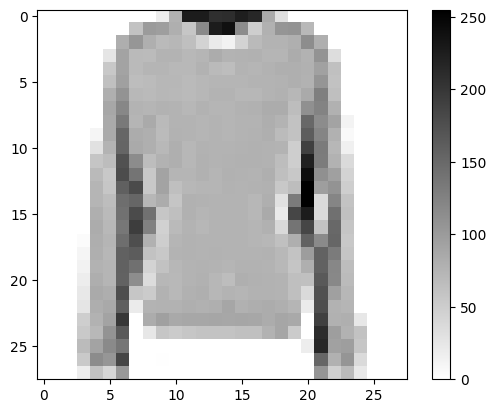

In [72]:
#show an image forn test data, for the moment only the first one
for image, tags in datos_entrenamiento.take(1):
  break
  image = imagen.numpy().reshape((28,28)) #resize, tensor

#draw
plt.figure()
plt.imshow(image, cmap= plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

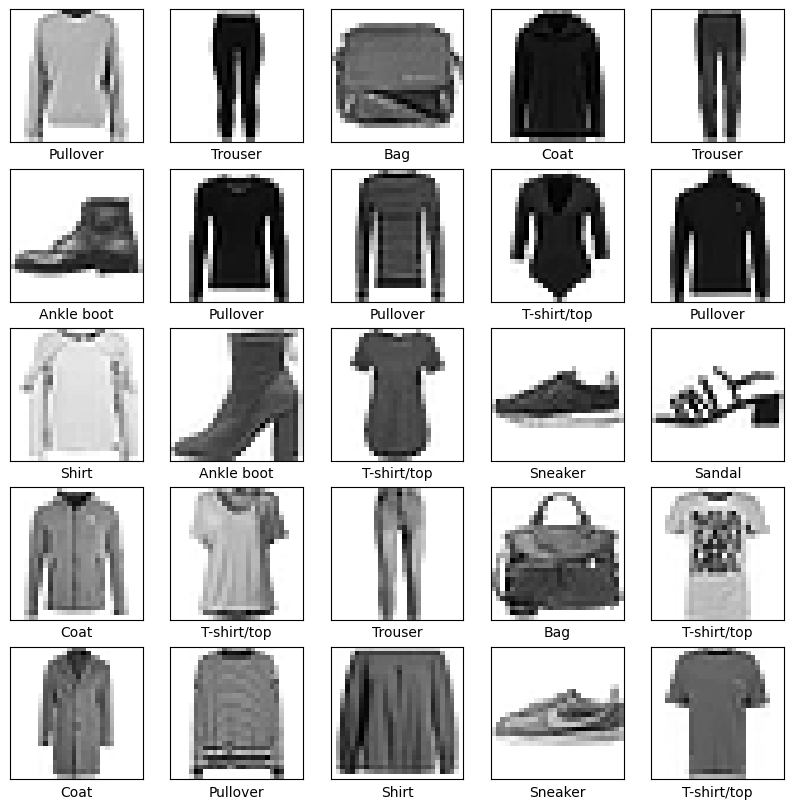

In [71]:
plt.figure(figsize=(10,10))
for i, (imagen,etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [57]:
myModel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 -black and white flat the array
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #for clasigication networks
])

In [73]:
myModel.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [74]:
num_ej_entenamiento = metadatos.splits['train'].num_examples
num_ej_pruebas = metadatos.splits['test'].num_examples

In [75]:
Lote_SIZE = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entenamiento).batch(Lote_SIZE)
datos_pruebas = datos_pruebas.batch(Lote_SIZE)

In [76]:
#TRAINING

historial = myModel.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entenamiento/Lote_SIZE))

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.5074 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4806 - accuracy: 0.8340
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4638 - accuracy: 0.8390
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8457
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4355 - accuracy: 0.8477


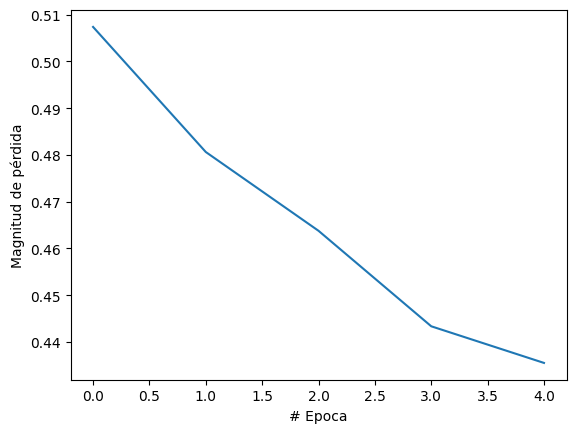

In [77]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])


1/1 [==============================] - 0s 18ms/step


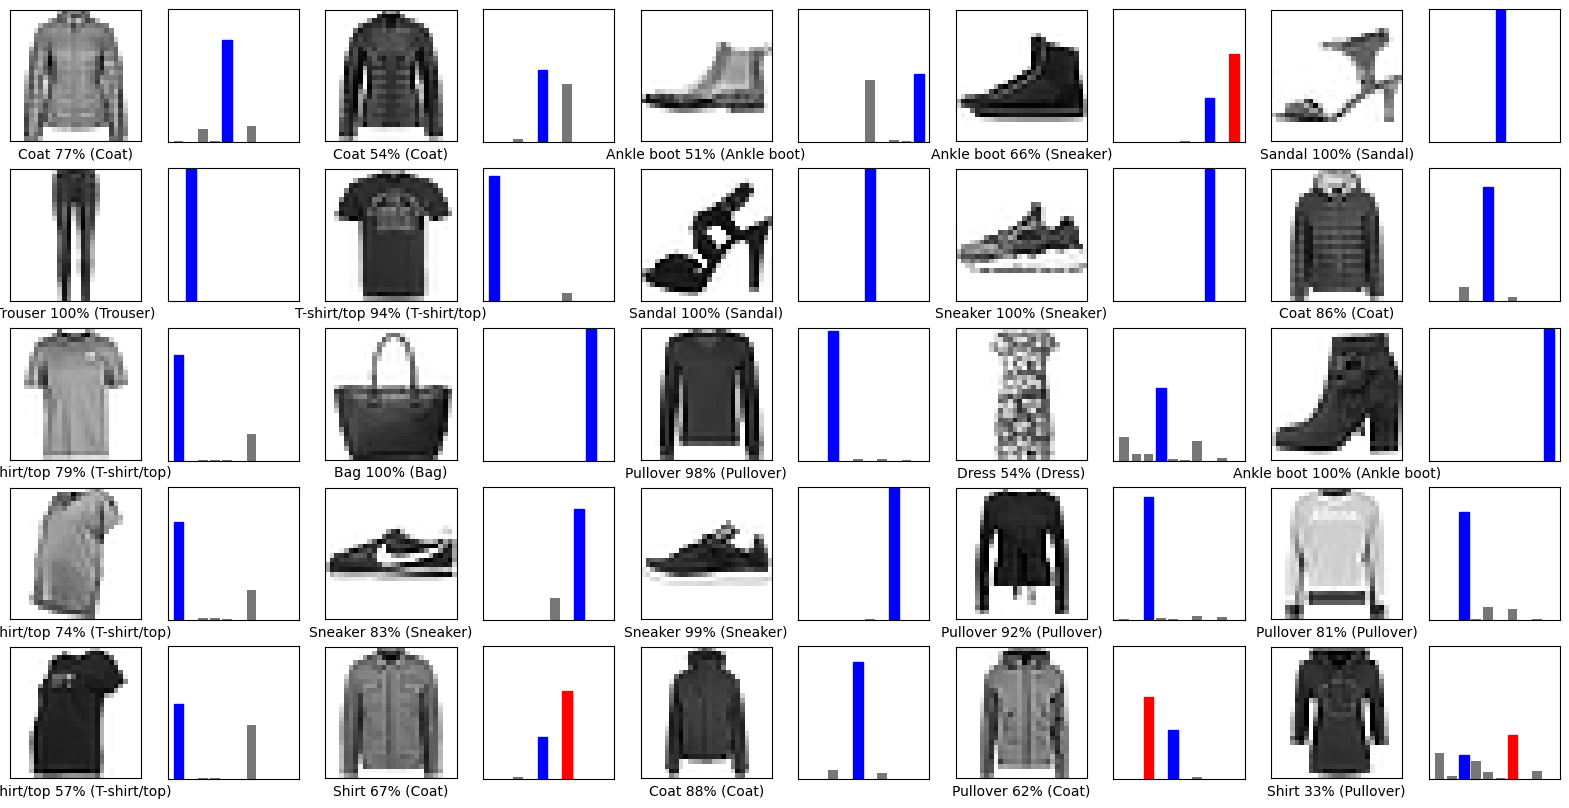

In [82]:
#test prediction with matplotlib.pyplot library
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones=myModel.predict(imagenes_prueba)

def graficar_imagen(i,arr_predicciones, etiquetas_reales,imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if(etiqueta_prediccion == etiqueta_real): color= 'blue' #si acertó
  else: color='red' #si no acertó

  plt.xlabel("{} {:2.0f}% ({})".format(
      nombres_clases[etiqueta_prediccion],
      100*np.max(arr_predicciones),
      nombres_clases[etiqueta_real],
      color=color
  ))

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0,1])
    etiqueta_prediccion = np.argmax(arr_predicciones)

    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))

for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)




In [84]:
#tomar cualquier indice del set  de pruebas para hacer predicciones
imagen = imagenes_prueba[5]
imagen = np.array([imagen])
prediccion = myModel.predict(imagen)
print(f"predicción {nombres_clases[np.argmax(prediccion[0])]}")

1/1 [==============================] - 0s 20ms/step
predicción Trouser
